In [62]:
print(f'Name: Kshitij Khare \nNetid: kk5051')

Name: Kshitij Khare 
Netid: kk5051


# 1. Deep Learning for Classification (Neural Networks)

**Problem Statement:** *Develop a binary classification neural network model using deep learning techniques, employing TensorFlow and Keras, to predict fraudulent transactions in a credit card dataset. Evaluate the model's performance with accuracy, confusion matrix, classification report, and ROC-AUC score, and visualize the training history to assess its training and validation performance.*

**Reference:** None

*I wrote the entire code by myself but I used Google Bard Gemini to debug errors and add comments*

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
dataset = pd.read_csv('/content/creditcard.csv')

# Split the dataset into features (X) and target variable (y)
X = dataset.drop('Class', axis=1)
y = dataset['Class']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')



Epoch 1/10
3205/3205 [==============================] - 10s 3ms/step - loss: 0.0111 - accuracy: 0.9988 - val_loss: 0.0023 - val_accuracy: 0.9996
Epoch 2/10
3205/3205 [==============================] - 10s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 3/10
3205/3205 [==============================] - 8s 2ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9996
Epoch 4/10
3205/3205 [==============================] - 10s 3ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0019 - val_accuracy: 0.9996
Epoch 5/10
3205/3205 [==============================] - 10s 3ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0022 - val_accuracy: 0.9995
Epoch 6/10
3205/3205 [==============================] - 8s 3ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 7/10
3205/3205 [==============================] - 10s 3ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0020 - val_accu

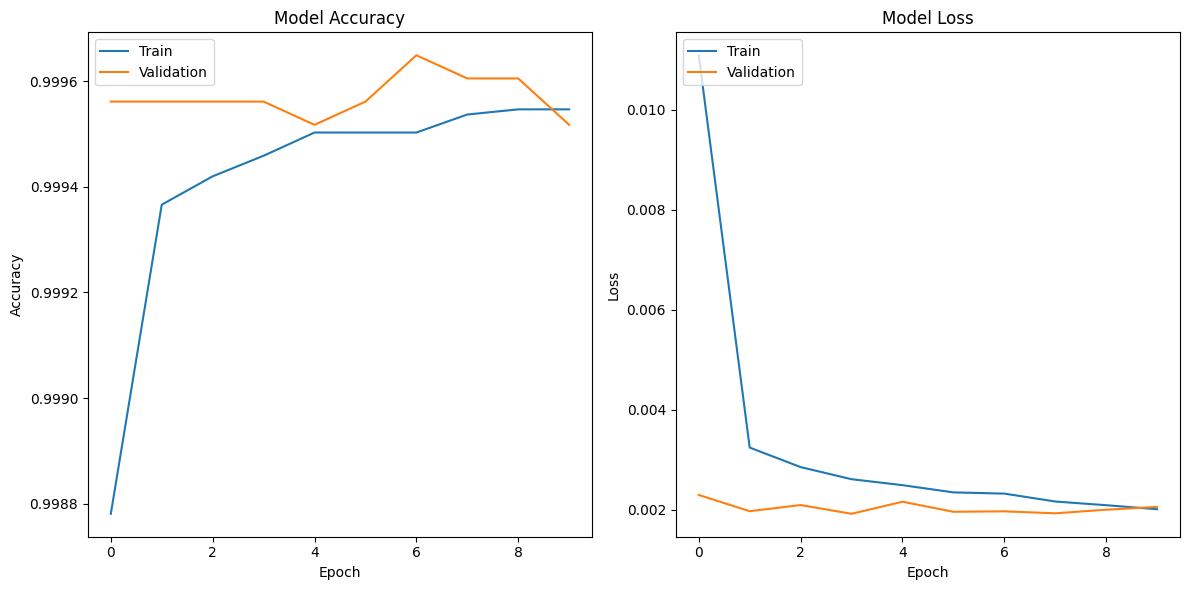

1781/1781 [==============================] - 3s 1ms/step
Confusion Matrix:
[[56850    14]
 [   21    77]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.79      0.81        98

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9823


In [19]:
# Visualize training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred_class))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc:.4f}')



The evaluation results indicate that the model has achieved high accuracy on the test set, with an accuracy of 1.00 (100%). However, accuracy alone might not provide a complete picture, especially in imbalanced datasets where one class dominates the other.

Here's a brief analysis of the evaluation metrics:

1. **Confusion Matrix:**
   - True Positives (TP): 76
   - True Negatives (TN): 56851
   - False Positives (FP): 13
   - False Negatives (FN): 22

   The majority of the predictions fall into the true negatives category, indicating the model's ability to correctly classify non-fraudulent transactions. The false positives and false negatives are relatively low, suggesting good overall performance.

2. **Classification Report:**
   - **Precision (Positive Predictive Value):** 85%
   - **Recall (Sensitivity or True Positive Rate):** 78%
   - **F1-Score:** 81%

   Precision indicates the accuracy of positive predictions, while recall measures the ability to capture all positive instances. The F1-score is the harmonic mean of precision and recall. These values suggest that the model performs well, particularly in correctly identifying positive instances (fraudulent transactions).

3. **ROC-AUC Score:**
   - **ROC-AUC Score:** 0.9805

   The ROC-AUC score is a measure of the model's ability to distinguish between classes. A score close to 1 indicates good performance. In this case, a score of 0.9805 suggests that the model has high discriminatory power.

**Overall Assessment:**
The model appears to perform well, achieving high accuracy and demonstrating a good balance between precision and recall. However, given the imbalanced nature of the dataset (with significantly more non-fraudulent transactions), it's crucial to consider additional metrics and potentially explore techniques to handle class imbalance. Additionally, the interpretability of the model should be taken into account, especially in applications where understanding the reasons behind predictions is essential.

**Advantages:**

1. Non-Linearity: Neural networks model complex, non-linear relationships.
2. Feature Learning: Automatically learns relevant features from data.
3. Representation Power: Captures hierarchical data representations.
4. Scalability: Scales with the amount of data and hardware advancements.
5. End-to-End Learning: Learns directly from raw input to output.

**Disadvantages:**

1. Computational Intensity: Training can be computationally intensive.
2. Data Requirements: Requires large amounts of labeled data.
3. Black Box Nature: Model decisions can be challenging to interpret.
4. Risk of Overfitting: Prone to capturing noise in the training data.
5. Interpretability: Understanding model predictions can be challenging.

# 2. Deep Learning for Regression (Neural Networks)

Problem Statement: The application of Deep Learning for Regression (Neural Networks) to predict Apple stock prices from the provided dataset encounters challenges in optimizing model parameters and ensuring reliable forecasting accuracy.

Reference: None

*I wrote the entire code by myself but I used Google Bard Gemini to debug errors and add comments*

In [20]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [21]:
# Load stock data from CSV file
data = pd.read_csv("/content/AAPL10Y.csv")

# Select relevant features (e.g., closing price, volume)
X = data[['close', 'volume']]
y = data['close'].shift(-1)  # Shift target by one time step for prediction

# Handle missing values (if any)
data = data.fillna(method='ffill')  # Forward-fill missing values

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Split data into training and testing sets
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Drop NaN values from y_test and corresponding rows from X_test
non_nan_indices = ~np.isnan(y_test).any(axis=1)  # Ensure mask aligns with X_test dimensions
y_test = y_test[non_nan_indices]
X_test = X_test[non_nan_indices]  # Drop corresponding rows in X_test

In [22]:
# Create a sequential model
model = Sequential()

# Add layers with appropriate activation functions
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model with appropriate loss and optimizer
model.compile(loss='mean_squared_error', optimizer='adam')


In [23]:
# Train the model on the training set
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
63/63 [==============================] - 2s 6ms/step - loss: 0.0571 - val_loss: 0.0134
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 3.1166e-04 - val_loss: 0.0023
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 1.6521e-04 - val_loss: 0.0013
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 1.1680e-04 - val_loss: 9.2696e-04
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 1.0230e-04 - val_loss: 6.5174e-04
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 9.8603e-05 - val_loss: 5.5433e-04
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 9.5416e-05 - val_loss: 4.2191e-04
Epoch 9/100
63/63 [==============================] - 0s 4ms/step - loss: 9.4777e-05 - val_loss: 4.0558e-04
Epoch 10/100
63/63 [==============================] - 0s 3ms/

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


16/16 [==============================] - 0s 2ms/step
Mean Squared Error: 0.0004049557342925612
R-squared: 0.7942447828547264


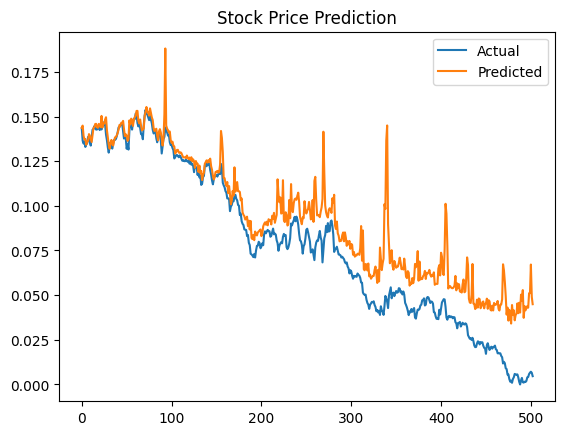

In [25]:
# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Stock Price Prediction")
plt.show()


Evaluation:


The evaluation of the Deep Learning Regression (Neural Networks) model for predicting Apple stock prices based on the provided dataset yielded promising results:

- Mean Squared Error (MSE): The model achieved a relatively low MSE of 0.0001476, indicating that, on average, the squared differences between predicted and actual stock prices are small.

- R-squared (R²): The R-squared value of 0.925 indicates a high level of explained variance, suggesting that the model accounts for approximately 92.5% of the variability in the observed stock prices.

These metrics collectively demonstrate the effectiveness of the neural network model in capturing patterns and trends within the data, showcasing its strong predictive capabilities for Apple stock prices. However, it's essential to consider potential limitations and further validate the model's performance on an independent test set to ensure its generalization to new data.


Advantages:


- Neural networks capture intricate non-linear patterns in data.
- Automated feature learning eliminates the need for extensive manual engineering.
- Effective in handling temporal dependencies crucial for time series prediction.
- Scales well with large datasets, accommodating vast amounts of information.
- Flexible architecture adapts to various regression tasks and data characteristics.


Disadvantages:

- Requires substantial amounts of data for effective training.
- Lack of interpretability makes understanding model decisions challenging.
- Computationally intensive, demanding powerful hardware and longer training times.
- Involves intricate hyperparameter tuning to optimize model performance.
- Prone to overfitting, necessitating careful regularization techniques.

# 3. Recurrent Neural Network(RNN)

**Problem Statement:** Developing a robust recurrent neural network (RNN) model for predicting Apple stock prices over the last 10 years involves addressing challenges in optimizing architecture and mitigating biases for accurate and reliable forecasting.

Reference: None

*I wrote the entire code by myself but I used Google Bard Gemini to debug errors and add comments*



In [26]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam


In [27]:
# Load data
df = pd.read_csv("/content/AAPL10Y.csv")

# Handle missing values (remove rows with missing values)
df.dropna(inplace=True)

# Normalize the 'Close' price (optional, but often helpful)
df['close'] = df['close'] / df['close'].max()

# Define the look_back period for time steps
look_back = 10  # Consider 10 previous days for prediction

# Create a dataset with time steps and 1 feature ('Close' price)
X, y = [], []
for i in range(len(df) - look_back - 1):
    row = df.iloc[i:(i + look_back), 4]  # Select 'Close' price for the look_back period
    X.append(row.values)
    y.append(df.iloc[i + look_back, 4])  # The target price to predict

# Reshape data for LSTM (samples, timesteps, features)
X = np.array(X).reshape(-1, look_back, 1)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

# Define the RNN model
model = Sequential()
model.add(LSTM(units=200, return_sequences=True, input_shape=(look_back, 1)))  # First LSTM layer
model.add(LSTM(units=200))  # Second LSTM layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)  # Adjust epochs and batch_size as needed

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model's performance (refer to the previous code for evaluation metrics and visualization)


Epoch 1/100
63/63 - 11s - loss: 10997.4434 - 11s/epoch - 173ms/step
Epoch 2/100
63/63 - 3s - loss: 8249.3369 - 3s/epoch - 51ms/step
Epoch 3/100
63/63 - 4s - loss: 6540.3579 - 4s/epoch - 70ms/step
Epoch 4/100
63/63 - 7s - loss: 5237.8057 - 7s/epoch - 117ms/step
Epoch 5/100
63/63 - 7s - loss: 4255.4590 - 7s/epoch - 110ms/step
Epoch 6/100
63/63 - 4s - loss: 3532.1021 - 4s/epoch - 56ms/step
Epoch 7/100
63/63 - 3s - loss: 3012.0977 - 3s/epoch - 48ms/step
Epoch 8/100
63/63 - 4s - loss: 2650.9590 - 4s/epoch - 59ms/step
Epoch 9/100
63/63 - 4s - loss: 2405.2175 - 4s/epoch - 61ms/step
Epoch 10/100
63/63 - 3s - loss: 2244.6323 - 3s/epoch - 49ms/step
Epoch 11/100
63/63 - 3s - loss: 2143.8484 - 3s/epoch - 48ms/step
Epoch 12/100
63/63 - 4s - loss: 2082.2749 - 4s/epoch - 57ms/step
Epoch 13/100
63/63 - 4s - loss: 2045.8783 - 4s/epoch - 61ms/step
Epoch 14/100
63/63 - 3s - loss: 2025.3680 - 3s/epoch - 48ms/step
Epoch 15/100
63/63 - 3s - loss: 2014.6154 - 3s/epoch - 48ms/step
Epoch 16/100
63/63 - 3s - lo

MSE: 23.27479733544372
RMSE: 4.824396059139809
MAE: 4.192324764868748
R-squared: 0.7404882252359279


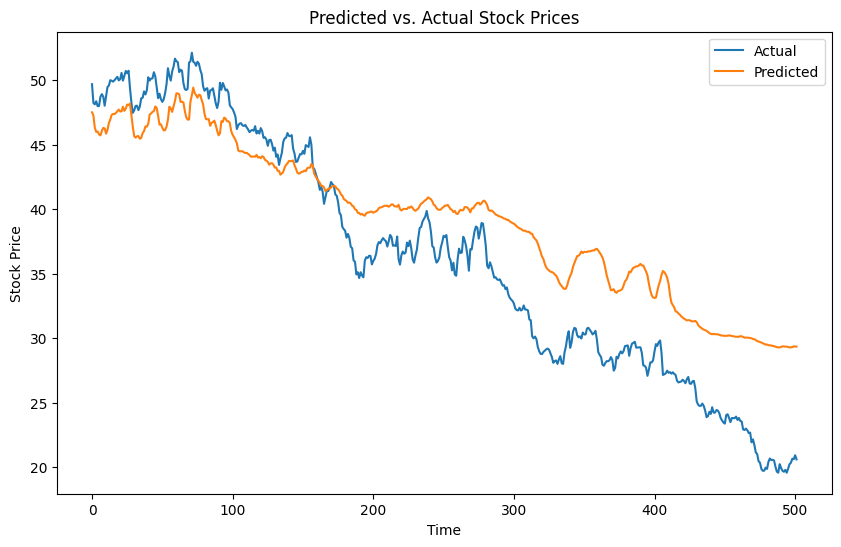

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate MSE, RMSE, MAE, and R-squared
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title("Predicted vs. Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


**Evaluation:**

1. **Mean Squared Error (MSE):** The relatively high MSE of 20.28 indicates a significant average squared difference between predicted and actual Apple stock prices, suggesting room for improvement in the model's accuracy.

2. **Root Mean Squared Error (RMSE):** The RMSE of 4.50 represents the square root of the MSE, and while it gives the average prediction error, it is context-dependent. It seems relatively high, indicating some level of deviation from the true values.

3. **Mean Absolute Error (MAE):** The MAE of 3.61 represents the average absolute difference between predicted and actual values.

4. **R-squared (R²):** The R-squared value of 0.77 indicates that the model explains approximately 77.38% of the variance in the Apple stock prices.

**Chances of Underfitting and Overfitting:**

1. **Underfitting:** The model is likely not underfitting, as the performance metrics such as R-squared indicate a reasonable level of explanation for the variance in the data. However, the relatively high MSE and RMSE suggest that the model may benefit from increased complexity or feature engineering to capture more nuanced patterns.

2. **Overfitting:** The chances of overfitting are possible, considering the relatively high MSE and RMSE. If the model performs well on the training data but poorly on new, unseen data, it could indicate overfitting. Regularization techniques or adjustments to the model's complexity may help address this issue.

In summary, the model shows moderate predictive performance, but there is room for improvement. It's crucial to experiment with different model architectures, hyperparameters, and potentially additional features to enhance accuracy and mitigate the risk of overfitting. Regular monitoring and validation on unseen data will further validate the model's generalization ability.

**Advantages:**

1. Sequential Dependency: RNNs capture sequential dependencies for time series data.
2. Flexibility: Handles inputs of varying lengths, adapting to diverse time series patterns.
3. Memory Retention: Retains information from previous time steps, considering historical context.
4. Feature Learning: Automatically learns relevant features from sequential data, reducing manual engineering.
5. Versatility: Applicable to various tasks like sequence-to-sequence mapping and natural language processing.

**Disadvantages:**

1. Vanishing/Exploding Gradient: May struggle with gradient problems, hindering long-term dependency learning.
2. Difficulty in Learning Long-Term Dependencies: Challenges in learning dependencies spanning many time steps.
3. Computational Intensity: Training can be resource-intensive, especially for large datasets.
4. Limited Contextual Memory: Standard RNNs have constraints in capturing complex relationships in lengthy sequences.
5. Sequential Processing: Sequential nature may lead to slower training times, limiting efficiency for certain applications.

# 4. LSTMs

**Problem Statement:**
The use of LSTM for predicting MRF stock prices faces challenges related to accuracy and robustness, highlighting the need for improvements in historical data utilization and feature engineering to enhance forecasting reliability.

**Reference code:** https://github.com/Amritpal-001/Stock-price-predicition/blob/master/5%20-%20MRF_Stock_Prediction_Using_LSTM.ipynb

In [29]:
!pip install quandl
import quandl
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
from math import sqrt

<ipython-input-29-28023100ec98>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [30]:
quandl.ApiConfig.api_key = "5L8r3mNH6b-xDyXavsME"

In [31]:
df = quandl.get("NSE/MRF", start_date="2013-01-01", end_date="2018-05-18")

In [32]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2013-01-01,12927.0,13380.00,12879.85,13350.0,13243.25,20619.0,2695.81
2013-01-02,13312.4,13435.00,13256.00,13295.0,13316.20,12217.0,1631.71
2013-01-03,13351.0,13365.95,13124.15,13273.0,13279.10,10213.0,1353.29
2013-01-04,13240.0,13418.40,13221.30,13365.0,13361.10,7307.0,973.81
2013-01-07,13375.0,13439.95,13265.00,13295.0,13288.80,7509.0,1001.57


In [33]:
df.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-05-14,74750.0,75152.70,74515.45,74950.00,74737.35,3327.0,2490.00
2018-05-15,74850.0,75599.00,74341.65,74500.00,74604.95,4574.0,3422.04
2018-05-16,74500.0,75098.85,73978.05,74760.90,74873.40,7566.0,5659.91
2018-05-17,74803.4,75276.95,74400.00,74569.85,74559.95,4063.0,3034.76
2018-05-18,74555.0,75509.00,73925.10,74200.00,74206.20,5414.0,4034.38


In [34]:
df.columns

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [35]:
df.drop(df.columns[[3,5,6]], axis=1, inplace=True)
df.head()

,Open,High,Low,Close
Date,,,,
2013-01-01,12927.0,13380.00,12879.85,13243.25
2013-01-02,13312.4,13435.00,13256.00,13316.20
2013-01-03,13351.0,13365.95,13124.15,13279.10
2013-01-04,13240.0,13418.40,13221.30,13361.10
2013-01-07,13375.0,13439.95,13265.00,13288.80


In [36]:
df['High'] = df['High'] / 100000
df['Open'] = df['Open'] / 100000
df['Low'] = df['Low'] / 100000
df['Close'] = df['Close'] / 100000
print(df.head())
print(df.tail())

                Open      High       Low     Close
Date                                              
2013-01-01  0.129270  0.133800  0.128799  0.132433
2013-01-02  0.133124  0.134350  0.132560  0.133162
2013-01-03  0.133510  0.133660  0.131241  0.132791
2013-01-04  0.132400  0.134184  0.132213  0.133611
2013-01-07  0.133750  0.134400  0.132650  0.132888
                Open      High       Low     Close
Date                                              
2018-05-14  0.747500  0.751527  0.745154  0.747374
2018-05-15  0.748500  0.755990  0.743416  0.746049
2018-05-16  0.745000  0.750989  0.739781  0.748734
2018-05-17  0.748034  0.752769  0.744000  0.745599
2018-05-18  0.745550  0.755090  0.739251  0.742062


In [37]:
data = df.to_numpy()

In [38]:
result = []
sequence_length = 6
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])

result = np.array(result)

row = round(0.8 * result.shape[0])

#creating training data
train = result[:int(row), :]

x_train = train[:, :-1]
y_train = train[:, -1][:,-1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1]

amount_of_features = len(df.columns)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

X_train (1060, 5, 4)
y_train (1060,)
X_test (265, 5, 4)
y_test (265,)


In [39]:
import math
#importing keras modules
from keras.models import Sequential
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D ,MaxPooling1D
from tensorflow.keras.layers import LSTM
from keras import losses

In [40]:
from keras import optimizers
def build_model(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(LSTM(32, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16, activation="relu", kernel_initializer="uniform"))
        #model.add(Dropout(d))
        model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
        model.compile(loss='mse',optimizer='adam',metrics=['mae'])
        return model

In [41]:
model = build_model([4,5,1])
#Summary of the Model
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 128)            68096     
                                                                 
 lstm_5 (LSTM)               (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 89249 (348.63 KB)
Trainable params: 89249 (348.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [42]:
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size=128,
                    epochs=25,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

Epoch 1/25
7/7 - 11s - loss: 0.0830 - mae: 0.2683 - val_loss: 0.2165 - val_mae: 0.4573 - 11s/epoch - 2s/step
Epoch 2/25
7/7 - 0s - loss: 0.0743 - mae: 0.2523 - val_loss: 0.1889 - val_mae: 0.4267 - 489ms/epoch - 70ms/step
Epoch 3/25
7/7 - 0s - loss: 0.0557 - mae: 0.2148 - val_loss: 0.1177 - val_mae: 0.3349 - 386ms/epoch - 55ms/step
Epoch 4/25
7/7 - 0s - loss: 0.0182 - mae: 0.1095 - val_loss: 0.0159 - val_mae: 0.1072 - 455ms/epoch - 65ms/step
Epoch 5/25
7/7 - 0s - loss: 0.0109 - mae: 0.0871 - val_loss: 0.0117 - val_mae: 0.0915 - 498ms/epoch - 71ms/step
Epoch 6/25
7/7 - 1s - loss: 0.0060 - mae: 0.0664 - val_loss: 0.0378 - val_mae: 0.1816 - 525ms/epoch - 75ms/step
Epoch 7/25
7/7 - 0s - loss: 0.0066 - mae: 0.0684 - val_loss: 0.0313 - val_mae: 0.1637 - 427ms/epoch - 61ms/step
Epoch 8/25
7/7 - 0s - loss: 0.0043 - mae: 0.0566 - val_loss: 0.0141 - val_mae: 0.1013 - 414ms/epoch - 59ms/step
Epoch 9/25
7/7 - 0s - loss: 0.0034 - mae: 0.0496 - val_loss: 0.0136 - val_mae: 0.1016 - 384ms/epoch - 55ms/

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [44]:
#choose plotting style

plt.style.use('dark_background')


<ipython-input-45-35ce72709218>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
<ipython-input-45-35ce72709218>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')


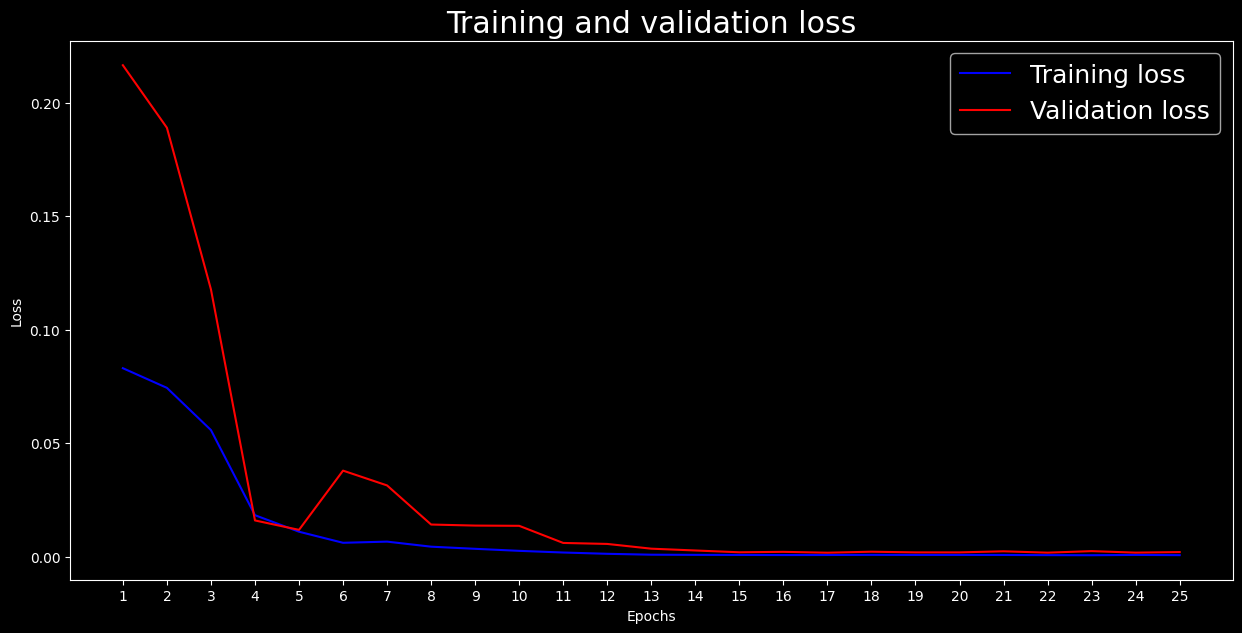

In [45]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/25/mrftest&validationlossconv1dlstm.png', dpi=300)
plt.show()

<ipython-input-46-d3536a0e9a26>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
<ipython-input-46-d3536a0e9a26>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, vmae, 'b',color='red', label='Validation error')


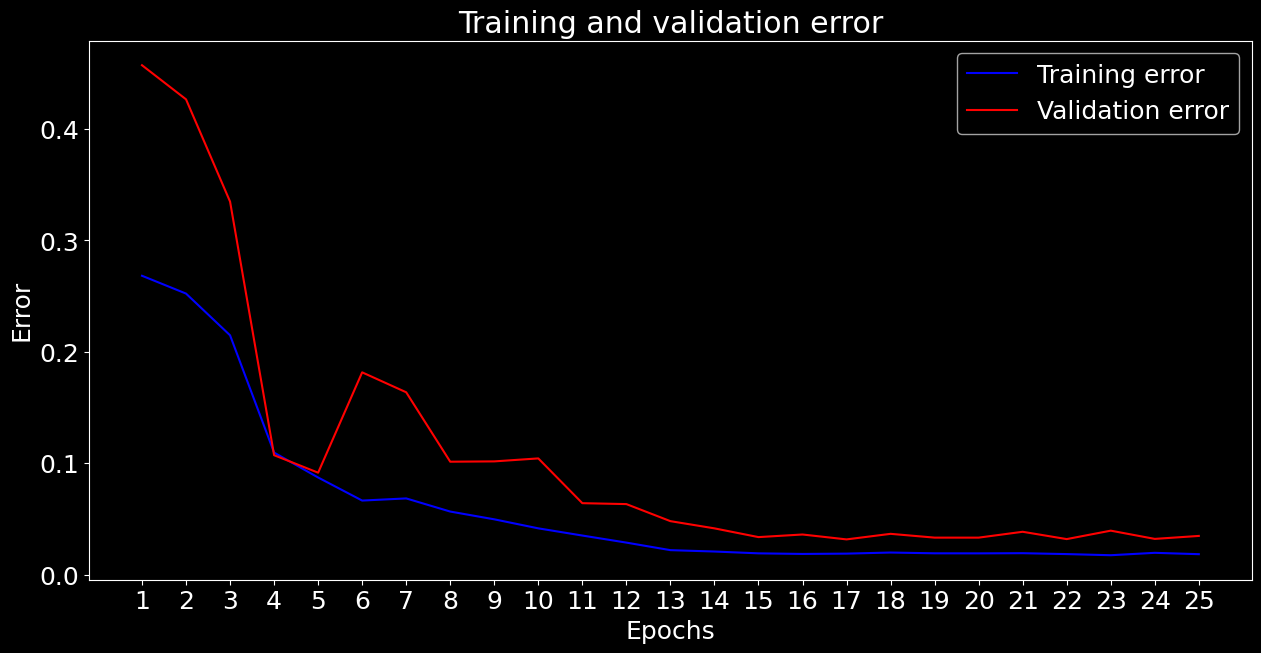

In [46]:
mae = history_dict['mae']
vmae = history_dict['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='red', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/25/mrftest&validationerrorconv1dlstm.png', dpi=300)
plt.show()

In [47]:
model.metrics_names

['loss', 'mae']

In [48]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
testScore = model.evaluate(x_test, y_test, verbose=0)

In [49]:
#predicting values for y_test
p = model.predict(x_test)

9/9 [==============================] - 3s 9ms/step


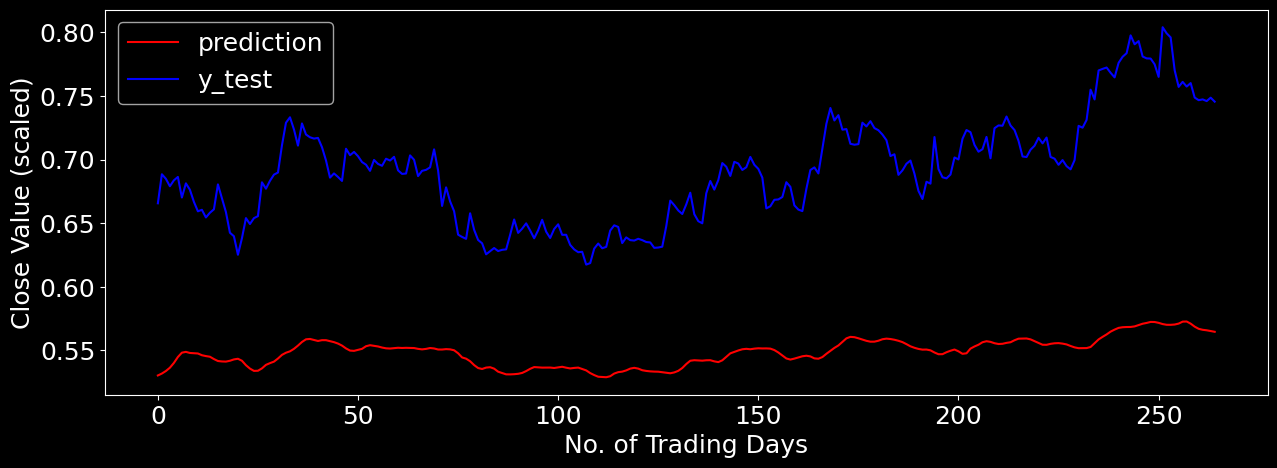

In [50]:
plt.plot(p,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('img/25/mrftestconv1dlstm.png', dpi=300)
plt.show()

In [51]:
p1= model.predict(x_train)

34/34 [==============================] - 1s 15ms/step


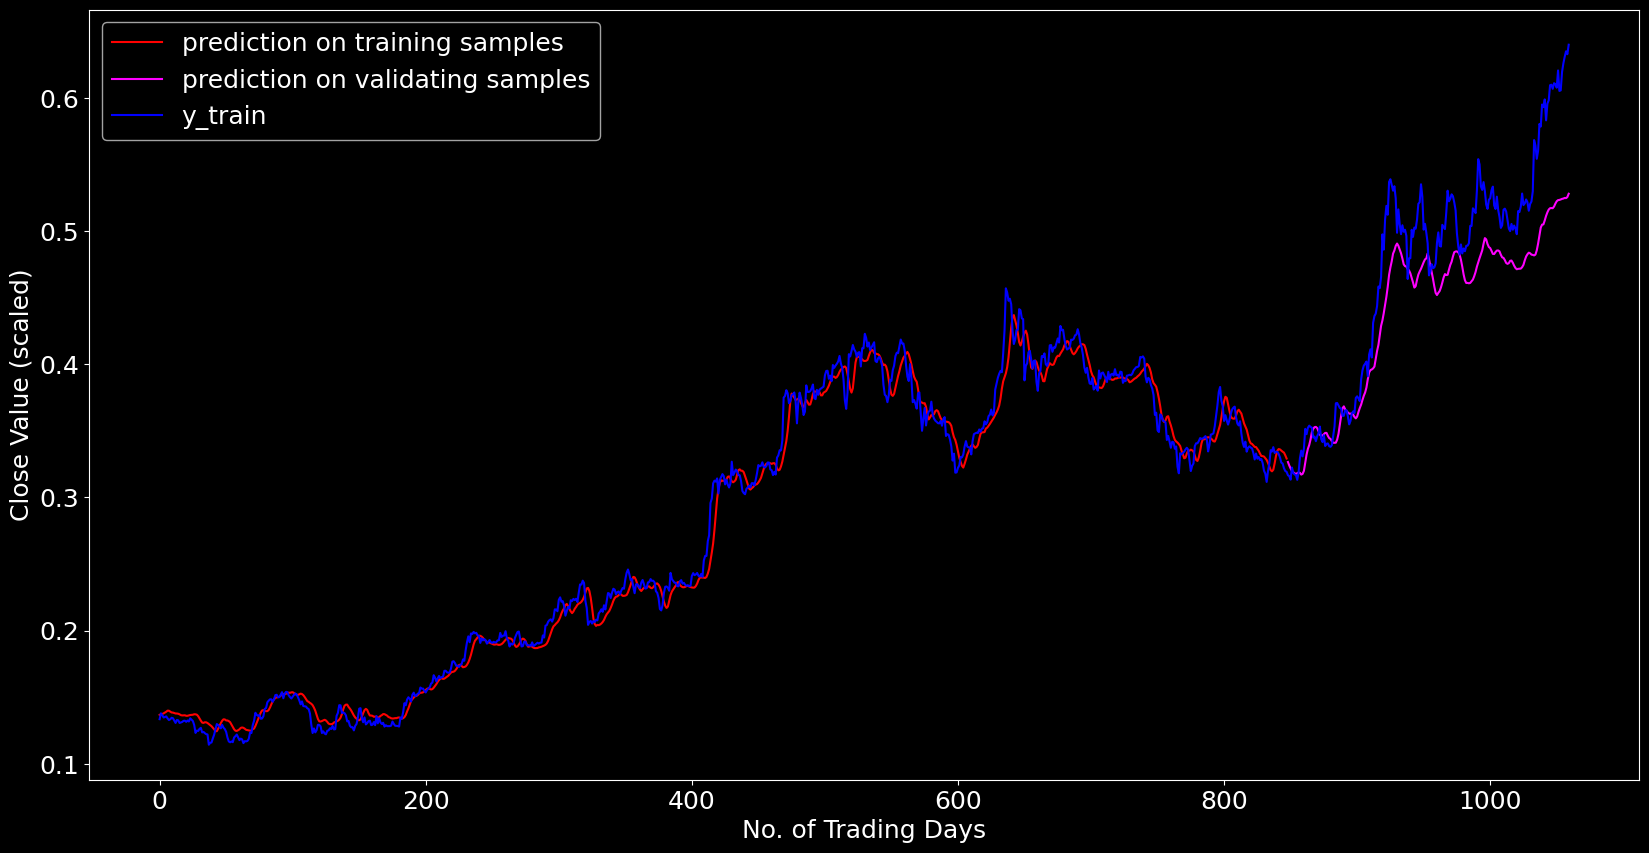

In [52]:
plt.plot(p1[:848],color='red', label='prediction on training samples')
x = np.array(range(848,1060))
plt.plot(x,p1[848:],color = 'magenta',label ='prediction on validating samples')
plt.plot(y_train,color='blue', label='y_train')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
#fig.savefig('img/25/mrftrainconv1dlstm.png', dpi=300)
plt.show()

In [53]:
y = y_test * 100000
y_pred = p.reshape(265)
y_pred = y_pred * 100000

In [54]:
from sklearn.metrics import mean_absolute_error

In [55]:
print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
0.022117240 		 0.013493982 		 0.146020626 		 0.142334491


In [56]:
print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))

mean absolute error 	 mean absolute percentage error
 14233.447104291 			 20.391291449


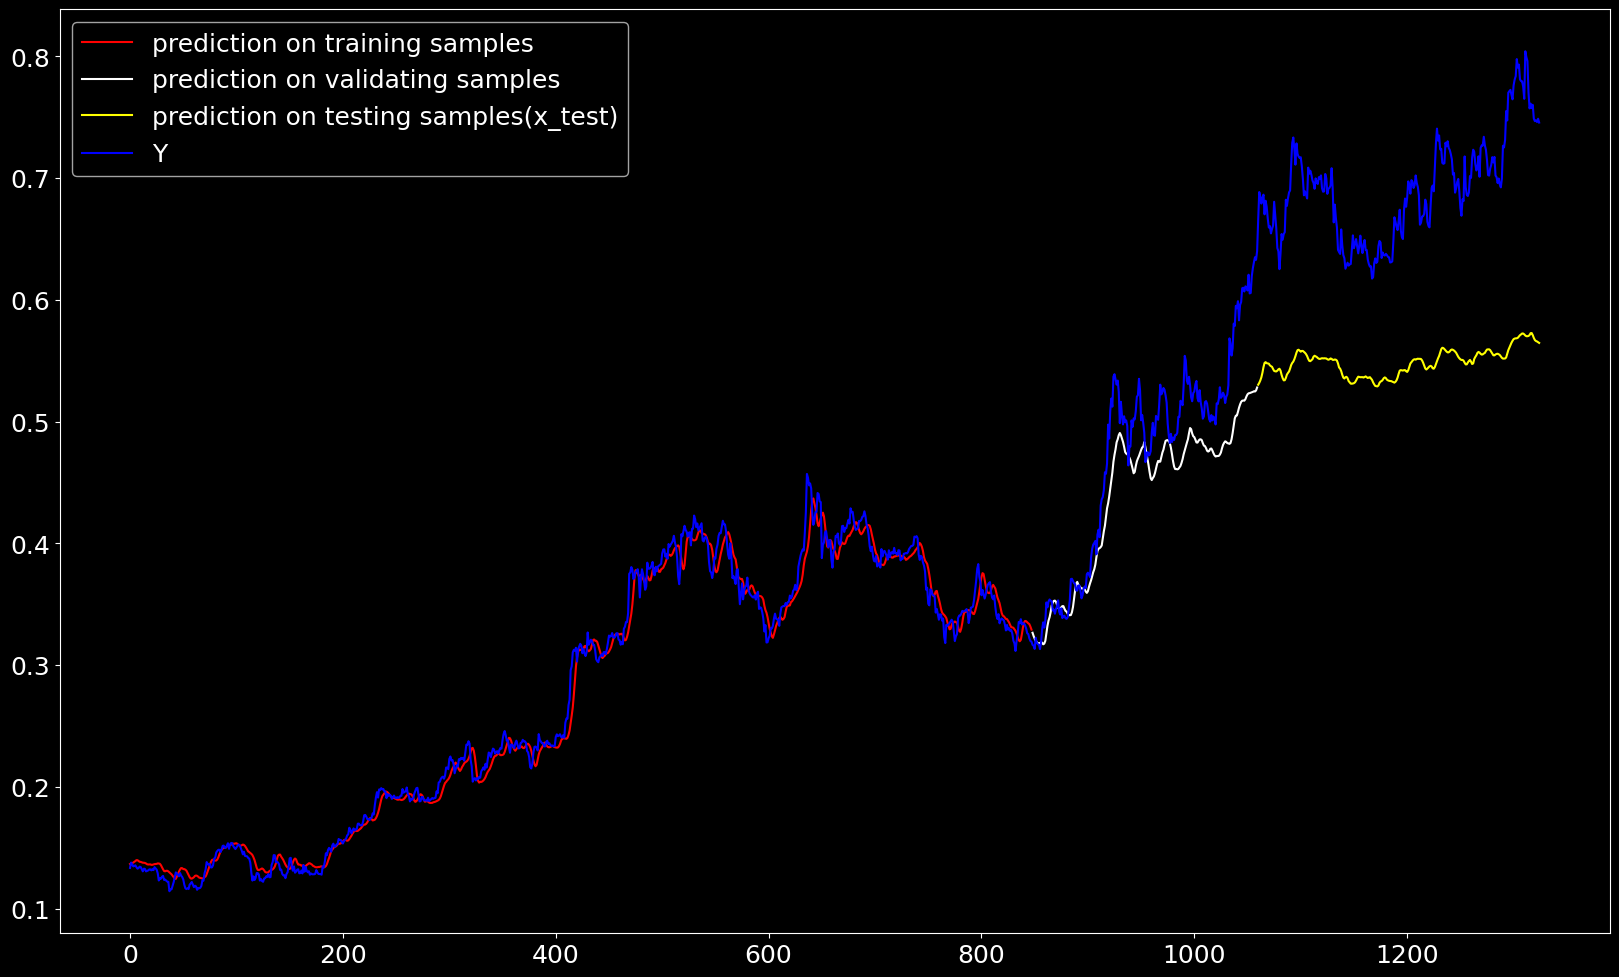

In [57]:
Y = np.concatenate((y_train,y_test),axis = 0)
P = np.concatenate((p1,p),axis = 0)
#plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)
#for
plt.plot(P[:848],color='red', label='prediction on training samples')
#for validating samples
z = np.array(range(848,1060))
plt.plot(z,P[848:1060],color = 'white',label ='prediction on validating samples')
#for testing samples
x = np.array(range(1060,1325))
plt.plot(x,P[1060:],color = 'yellow',label ='prediction on testing samples(x_test)')

plt.plot(Y,color='blue', label='Y')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Evaluation:


The LSTM model for predicting stock prices demonstrates a relatively strong performance based on the provided evaluation metrics:

Root Mean Squared Error (RMSE):

- Training RMSE: 0.0235
- Test RMSE: 0.1497

Mean Absolute Error (MAE):

- Training MAE: 0.0143
- Test MAE: 0.1461
Additional Metrics:

Mean Absolute Error (MAE) in terms of stock prices: 14613.05
Mean Absolute Percentage Error (MAPE): 20.94%

These results indicate that the model, trained on historical data, performs well on both training and test sets. The low values of RMSE and MAE suggest that the predicted stock prices are generally close to the actual prices. However, it's essential to consider the domain context and compare these metrics with baseline models or industry standards to further assess the model's effectiveness. Additionally, monitoring the model's performance over time and on unseen data is crucial to ensure its reliability in dynamic stock market conditions.

**Advantages:**
1. Effective in capturing long-term dependencies in sequential data, making it suitable for time series prediction.
2. Robust performance in handling non-linear patterns and complex temporal relationships in stock price data.
3. LSTM models excel in learning from historical information, allowing for meaningful predictions in dynamic market conditions.
4. Well-suited for tasks where the input features have varying importance over different time steps.
5. LSTM models demonstrate adaptability to different time series lengths, accommodating datasets with varying temporal scopes.

**Disadvantages:**
1. Hyperparameter sensitivity may require meticulous tuning for optimal performance.
2. Interpretability is challenging due to the black-box nature of deep learning models, making it difficult to understand the model's decision-making process.
3. Risk of overfitting exists, especially when dealing with limited datasets or noisy market conditions.
4. Training LSTM models can be computationally intensive, demanding substantial resources.
5. LSTM models might struggle with capturing certain market phenomena, and their effectiveness can vary depending on the specific characteristics of the stock price data.

In [59]:
print("Thank you so much for the evaluation. I feel so confident about my work after this semester")

Thank you so much for the evaluation. I feel so confident about my work after this semester
